In [30]:
import pandas as pd

data_file = pd.read_csv("habit_data_manually.csv",index_col=0)
data_file.shape
data_file

,category,gender,ageGeneration,country,profession,partsOfTheDay
label,,,,,,
Habit h1,Health,Female,Gen X,India,Software Engineer,night
Habit h2,Productivity,Female,Gen Z,India,Doctor,morning
Habit h3,Learning,Female,Millennial,India,Marketing Manager,noon
Habit h3,Finances,Female,Baby Boomer,India,Doctor,afternoon
Habit h3,Social,Female,Gen Z,India,Doctor,sunset
Habit h1,Health,Female,Gen X,India,Software Engineer,night
Habit h2,Productivity,Female,Gen Z,India,Doctor,morning
Habit h3,Learning,Female,Millennial,India,Marketing Manager,morning
Habit h3,Finances,Female,Baby Boomer,India,Doctor,sunset


In [31]:
# Parse textual data
data_file["gender_code"] = data_file['gender'].astype("category").cat.codes
data_file["ageGeneration_code"] = data_file['ageGeneration'].astype("category").cat.codes
data_file["profession_code"] = data_file['profession'].astype("category").cat.codes
data_file["partsOfTheDay_code"] = data_file['partsOfTheDay'].astype("category").cat.codes


#gender
#[0, 1]
#['Female', 'Male']

#ageGeneration_code
#[0, 1, 2, 3]
#['Baby Boomer', 'Gen X', 'Gen Z', 'Millennial']

#profession_code
#[0, 1, 2]
#['Marketing Manager', 'Software Engineer', 'Doctor']

#partsOfTheDay
#[0, 1, 2, 3, 4, 5]
#['morning', 'sunset', 'sunrise', 'noon', 'afternoon', 'night']

In [7]:
target = "category"
ignored_columns = ["gender",
                  "ageGeneration",
                  "profession",
                   "country",
                   "partsOfTheDay"
                  ]
ignored_columns.append(target)
input_columns = list(set(data_file.columns.array).difference(ignored_columns))
input_columns

['profession_code', 'gender_code', 'ageGeneration_code', 'partsOfTheDay_code']

array([[<Axes: title={'center': 'gender_code'}>,
        <Axes: title={'center': 'ageGeneration_code'}>],
       [<Axes: title={'center': 'profession_code'}>,
        <Axes: title={'center': 'partsOfTheDay_code'}>]], dtype=object)

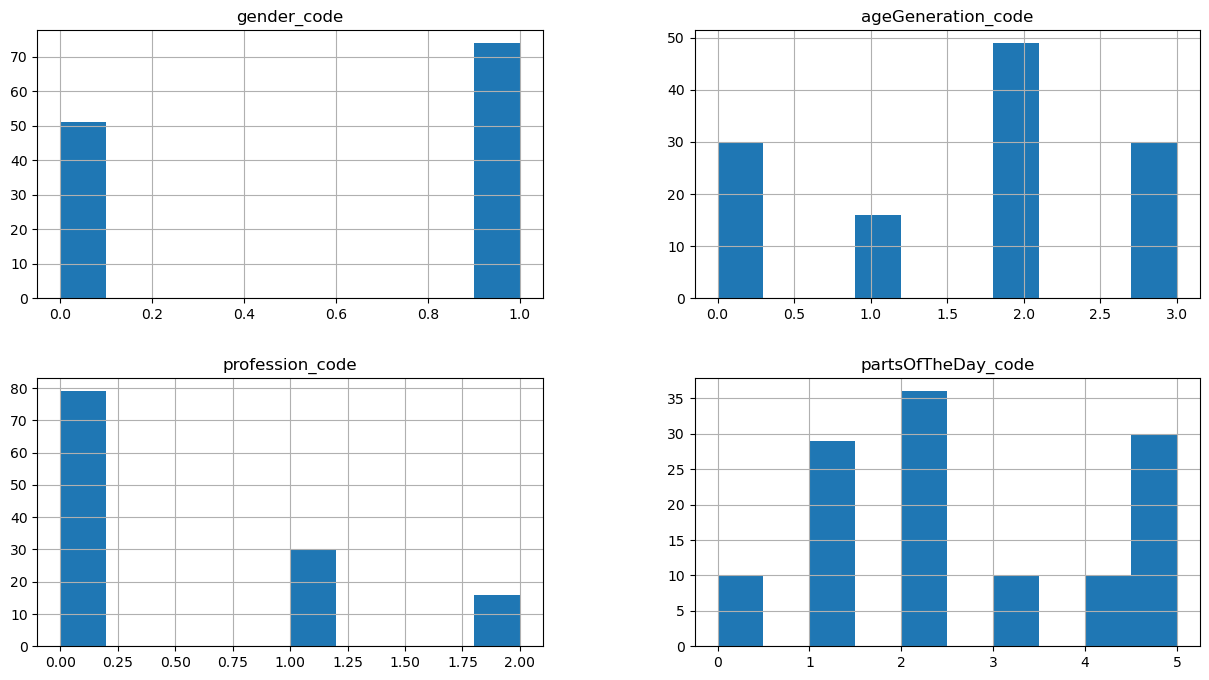

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data_file.drop(columns=ignored_columns,axis=1)
y = data_file[target]

# we using 20% of our data to test this model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_data = X_train.join(y_train)


In [ ]:
train_data.hist(figsize=(15,8))

In [33]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train.values, y_train)

predictions = model.predict(X_test.values)

score = accuracy_score(y_test, predictions)
print(score)

1.0


In [5]:
import pickle
# Save the model to disk
filename = 'habit_pred_model.pkl'
pickle.dump(model, open(filename, 'wb'))

NameError: name 'model' is not defined

In [6]:
savedModel = pickle.loads('habit_pred_model.pkl') 

TypeError: a bytes-like object is required, not 'str'

In [12]:
from sklearn import tree
tree.export_graphviz(
    model,
    out_file="habit-category-recommander.dot",
    feature_names=input_columns,
    class_names=sorted(y.unique()),
    label="all",
    rounded=True,
    filled=True)

In [9]:
#gender
#[0, 1]
#['Female', 'Male']

#ageGeneration_code
#[0, 1, 2, 3]
#['Baby Boomer', 'Gen X', 'Gen Z', 'Millennial']

#profession_code
#[0, 1, 2]
#['Marketing Manager', 'Software Engineer', 'Doctor']

#partsOfTheDay
#[0, 1, 2, 3, 4, 5]
#['morning', 'sunset', 'sunrise', 'noon', 'afternoon', 'night']

In [1]:
predictions = savedModel.predict([[1,2,1,5]])
print(predictions)

NameError: name 'savedModel' is not defined

In [2]:
#import libs
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

target = "genre"
# import dataSet file
data = pd.read_csv("music.csv")
X = data.drop(columns=target)
y = data[target]
print(data.shape) # to display data rows & cols length
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# train model
model = DecisionTreeClassifier()
model.fit(X_train.values, y_train)
predictions = model.predict(X_test.values)

# calculate accuarcy
score = accuracy_score(y_test, predictions)
print(score)

# make prediction
# 24 year man music type and 36 year woman ?
model.predict([[24,1],[36,0]])

# export GraphViz
columns = data.columns.drop(target).array
tree.export_graphviz(
    model,
    out_file="music-genre-recommander.dot",
    feature_names=columns,
    class_names=sorted(y.unique()),
    label="all",
    rounded=True,
    filled=True)

(18, 3)
1.0


In [41]:
import sklearn
print(sklearn.__version__)


1.3.0
